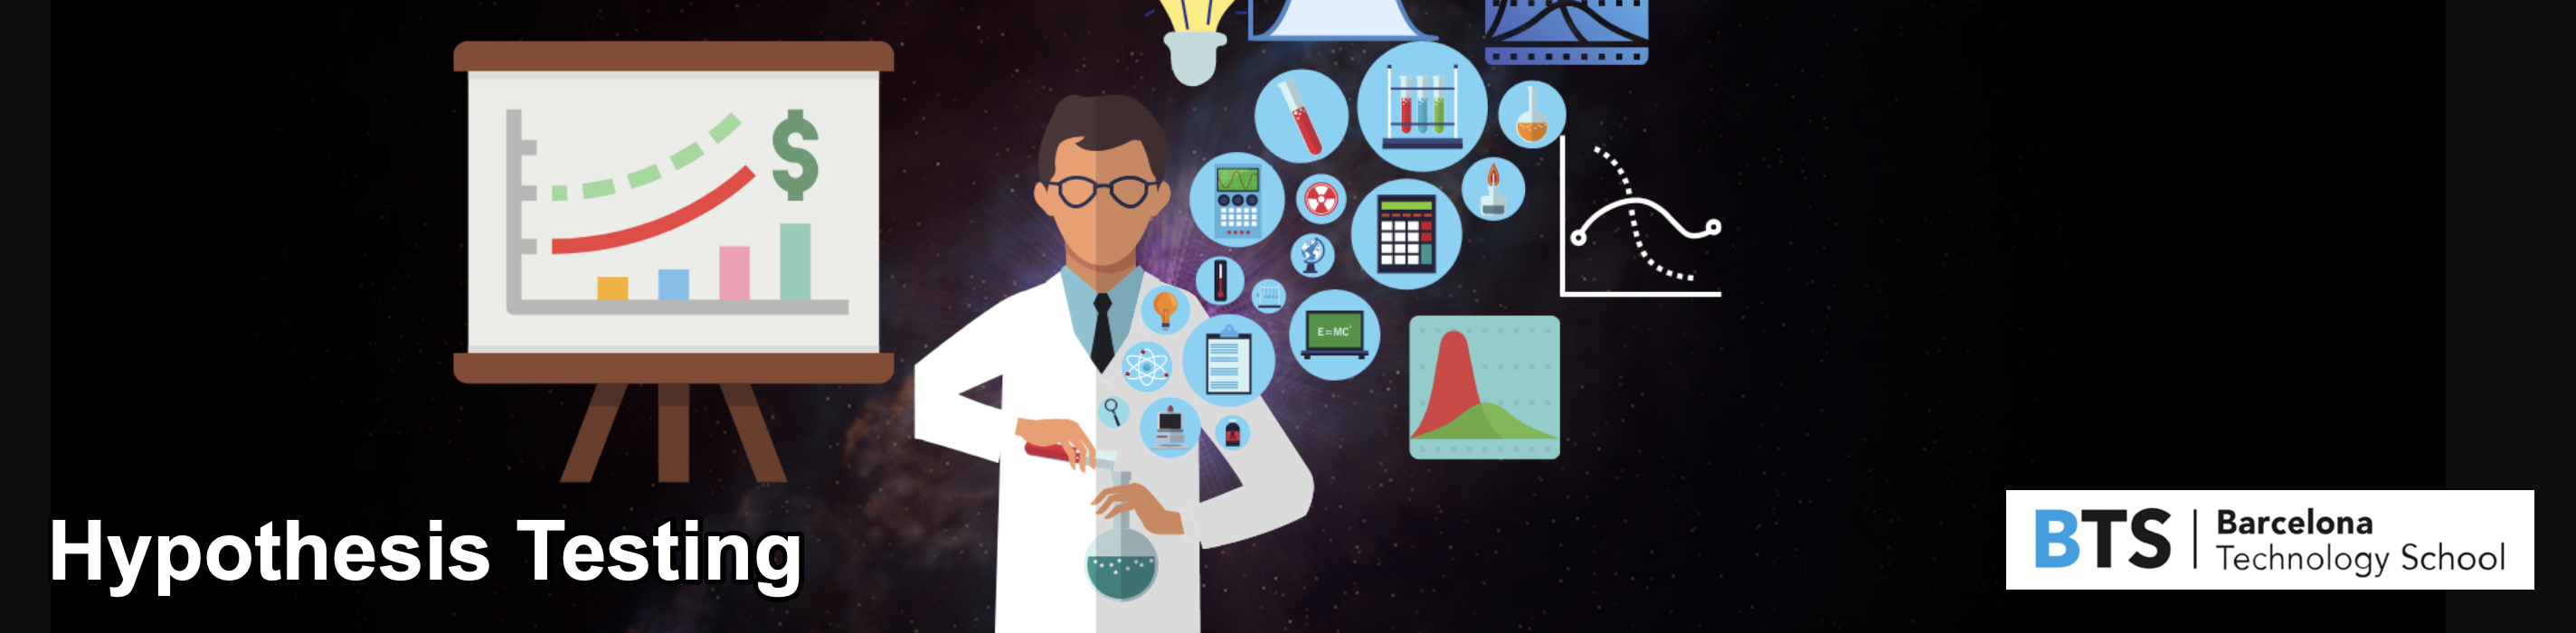

# Hypothesis testing

## Exercise 1. 

Here you have the results of a study of individuals who do their own tax returns. The data in the table give the time they need to file their return.

In [8]:
import numpy as np

data = np.array([3.1, 5.8, 1.4, 2.4, 4. , 4.6, 1.3, 1.6, 5.2, 2.4, 2.4, 4.3, 7.4,
       4.8, 5.9, 3.2, 1.8, 5.2, 4.2, 2.2, 4.4, 3.1, 5.6, 6.2, 3.7, 4.8,
       3.2, 1.6, 5.4, 4.7, 2.8, 4.2, 3.4, 4.8, 4.6, 3.8, 2.2, 5.8, 3.4,
       2.8, 3.2, 2.6, 4. , 5.4, 2.4, 3.4, 4. , 0.8, 2.6, 3.5])

In general, the average time reported to do the taxes is μ=4.5 hours.

Can we affirm that our group of individuals do their taxes in less than 4.5 hours?

The hypotheses are:\
H0: $\mu = 4.5$\
H1: $\mu < 4.5$

Do the following:

1. Calculate the mean $\bar{x}$, the standard deviation $s_x$ and the standard error of the sample $s_\bar{x}=s_x/\sqrt{n}$.
2. Draw the histogram of the sample (use density, not absolute frequencies). Make bins of size 1 between 0 and 8.
3. Overlap on the drawing the Probability Density Function of the normal distribution of the sample (with the sample mean  $\bar{x}$ and the standard deviation of the mean $s_x$).
4. Add two vertical lines: one at the value of the sample mean in blue, and the other one at $\mu$=4.5 in black.
5. Draw another graph with the Histogram overlapped with the Probability Density Function of the normal distribution of the mean of the sample (with the sample mean $\bar{x}$ and the standard error of the mean $s_\bar{x}$). Add the two vertical lines as in (4). If you want, you can artifitially reescale the PDF of the mean for visual purposes only so that the peak of the normal distribuion has a height of 0.25, similar to the peak of the histogram. 
6. Calculate the test statistic. It is the value the of the standard normal distribution with a mean equal to the null hypothesis: $$t =\frac{\bar{x}-\mu}{s_x/\sqrt{n}}$$
where $\bar{x}$ is the sample mean and $\mu$ is the expected mean of the null hypothesis.
7. Caculate the p-value, i.e., the probability that the value of the standard normal distribution $z$ is more extreme than $t$: $P(z<t)$. You can also calculathe the probability that the mean of the population is larger than the $\mu$ of the null hypothesis: $P(\bar{x}>\mu)$.
8. Conclude the hypothesis test and decide if your sample of individuals do their taxes in less than 4.5 hours.

In [13]:
import matplotlib.pyplot as plt
import scipy.stats as stats

### 1. Calculate mean, standard deviation, and standard error

In [23]:
mean_x = np.mean(data)
std_x = np.std(data, ddof=1)
n = len(data)
std_error = std_x / np.sqrt(n)
print(f"Mean: {mean_x}")
print(f"Standard deviation: {std_x}")
print(f"Standard error: {std_error}")

Mean: 3.7119999999999997
Standard deviation: 1.4591918367118597
Standard error: 0.20636088855820187


### 2. Plot histogram of Sample

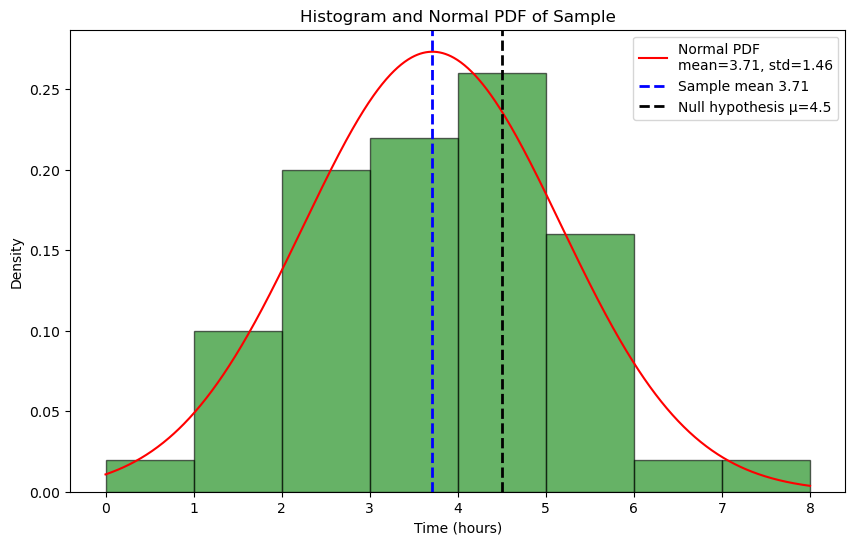

In [31]:
plt.figure(figsize=(10, 6))
plt.hist(data, bins=np.arange(0, 9, 1), density=True, alpha=0.6, color='g', edgecolor='black')

# 3. Overlay normal PDF of sample
x_values = np.linspace(0, 8, 1000)
pdf_values = stats.norm.pdf(x_values, mean_x, std_x)
plt.plot(x_values, pdf_values, label=f'Normal PDF\nmean={mean_x:.2f}, std={std_x:.2f}', color='r')


# 4. Add vertical lines for mean and μ=4.5
plt.axvline(mean_x, color='blue', linestyle='dashed', linewidth=2, label=f'Sample mean {mean_x:.2f}')
plt.axvline(4.5, color='black', linestyle='dashed', linewidth=2, label='Null hypothesis μ=4.5')

plt.legend()
plt.xlabel('Time (hours)')
plt.ylabel('Density')
plt.title('Histogram and Normal PDF of Sample')
plt.show()

### 3. Plot histogram of Sample Mean

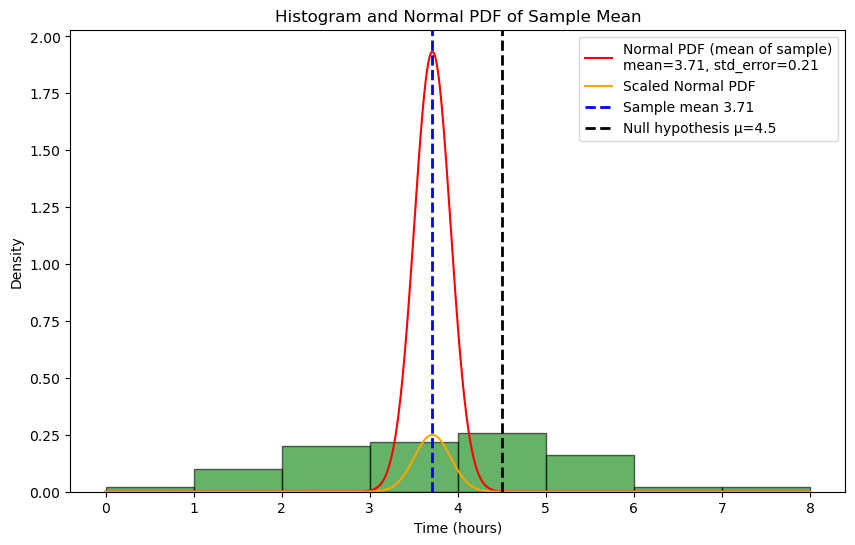

In [49]:
# 5. Overlay histogram with normal PDF of the sample mean
pdf_mean = stats.norm.pdf(x_values, mean_x, std_error)
plt.figure(figsize=(10, 6))
plt.hist(data, bins=np.arange(0, 9, 1), density=True, alpha=0.6, color='g', edgecolor='black')
plt.plot(x_values, pdf_mean, label=f'Normal PDF (mean of sample)\nmean={mean_x:.2f}, std_error={std_error:.2f}', color='r')

# Adjusting for visual scaling
pdf_mean_scaled = pdf_mean * 0.25 / max(pdf_mean)
plt.plot(x_values, pdf_mean_scaled, label=f'Scaled Normal PDF', color='orange')

plt.axvline(mean_x, color='blue', linestyle='dashed', linewidth=2, label=f'Sample mean {mean_x:.2f}')
plt.axvline(4.5, color='black', linestyle='dashed', linewidth=2, label='Null hypothesis μ=4.5')

plt.legend()
plt.xlabel('Time (hours)')
plt.ylabel('Density')
plt.title('Histogram and Normal PDF of Sample Mean')
plt.show()

### 4. Test Statistic, P-Value and Conclusion

In [55]:
# 6. Calculate the test statistic
t_stat = (mean_x - 4.5) / std_error
print(f"Test statistic: {t_stat}")

# 7. Calculate the p-value
p_value = stats.norm.cdf(t_stat)
print(f"P-value: {p_value:.4f}")

# 8. Conclusion
if p_value < 0.05:
    conclusion = "Reject H0: The sample suggests that the average time to do taxes is less than 4.5 hours. The sample provides sufficient evidence to conclude that the average time to do taxes is statistically."
else:
    conclusion = "Fail to reject H0: The sample does not provide enough evidence to conclude that the average time to do taxes is less than 4.5 hours. There is not enough evidence in the sample to conclude that the average time to do taxes is less than 4.5 hours."

# Print results
print(conclusion)

Test statistic: -3.8185530480392043
P-value: 0.0001
Reject H0: The sample suggests that the average time to do taxes is less than 4.5 hours. The sample provides sufficient evidence to conclude that the average time to do taxes is statistically.
